### Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,f1_score

##### Load data

In [2]:
df = pd.read_csv('/online_course_engagement_data.csv')
df.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0


In [3]:
df.shape

(9000, 9)

In [4]:
df.describe()

,UserID,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4498.894556,50.163822,10.024667,5.090556,74.706028,50.340146,0.500667,0.396444
std,2596.849433,28.491750,6.029878,3.157762,14.378383,28.950977,0.500027,0.489186
min,1.000000,1.005230,0.000000,0.000000,50.005119,0.009327,0.000000,0.000000
25%,2251.750000,25.440548,5.000000,2.000000,62.283451,25.653614,0.000000,0.000000
50%,4483.500000,49.818417,10.000000,5.000000,74.743294,50.264124,1.000000,0.000000
75%,6751.250000,75.069924,15.000000,8.000000,87.022663,75.572493,1.000000,1.000000
max,9000.000000,99.992558,20.000000,10.000000,99.994984,99.979711,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 9000 non-null   int64  
 1   CourseCategory         9000 non-null   object 
 2   TimeSpentOnCourse      9000 non-null   float64
 3   NumberOfVideosWatched  9000 non-null   int64  
 4   NumberOfQuizzesTaken   9000 non-null   int64  
 5   QuizScores             9000 non-null   float64
 6   CompletionRate         9000 non-null   float64
 7   DeviceType             9000 non-null   int64  
 8   CourseCompletion       9000 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 632.9+ KB


### Data preprocessing

##### Checking for null values

In [6]:
df.isnull().sum()

UserID                   0
CourseCategory           0
TimeSpentOnCourse        0
NumberOfVideosWatched    0
NumberOfQuizzesTaken     0
QuizScores               0
CompletionRate           0
DeviceType               0
CourseCompletion         0
dtype: int64

##### Checking for duplicates

In [7]:
df.duplicated().sum()

877

In [8]:
# Drop duplicates
df = df.drop_duplicates()
df.shape

(8123, 9)

##### Standardization

In [9]:
# Select the features to standardize
features_to_standardize = ['TimeSpentOnCourse', 'NumberOfVideosWatched', 'NumberOfQuizzesTaken', 'QuizScores', 'CompletionRate']

# Create a StandardScaler object
scaler = StandardScaler()

# Standardize the features
df[features_to_standardize] = scaler.fit_transform(df[features_to_standardize])
df.head()

<ipython-input-9-7bbc2b8f5bde>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features_to_standardize] = scaler.fit_transform(df[features_to_standardize])


,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,-0.727300,1.144348,-0.691888,-1.724349,-1.043422,1,0
1,4326,Arts,-0.804060,-1.527840,-0.053301,-0.870013,0.496820,1,0
2,5849,Arts,1.276786,0.643313,-1.011181,0.234876,0.434194,1,1
3,4992,Science,-0.548941,1.144348,1.543166,-1.108323,1.522031,0,1
4,3866,Programming,1.476704,0.977336,-1.649768,1.627534,-1.138313,0,0


##### Encoding categorical features

In [10]:
# Create a LabelEncoder object
encoder = LabelEncoder()

# Encode the CourseCategory feature
df['CourseCategory_encoded'] = encoder.fit_transform(df['CourseCategory'])
encoded_df = df.drop('CourseCategory', axis=1)
encoded_df.head()

,UserID,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion,CourseCategory_encoded
0,5618,-0.727300,1.144348,-0.691888,-1.724349,-1.043422,1,0,2
1,4326,-0.804060,-1.527840,-0.053301,-0.870013,0.496820,1,0,0
2,5849,1.276786,0.643313,-1.011181,0.234876,0.434194,1,1,0
3,4992,-0.548941,1.144348,1.543166,-1.108323,1.522031,0,1,4
4,3866,1.476704,0.977336,-1.649768,1.627534,-1.138313,0,0,3


### Exploratory Data Analysis

In [11]:
# drop UserID and CourseCategory
df_new = encoded_df.drop(['UserID','CourseCategory_encoded'], axis=1)

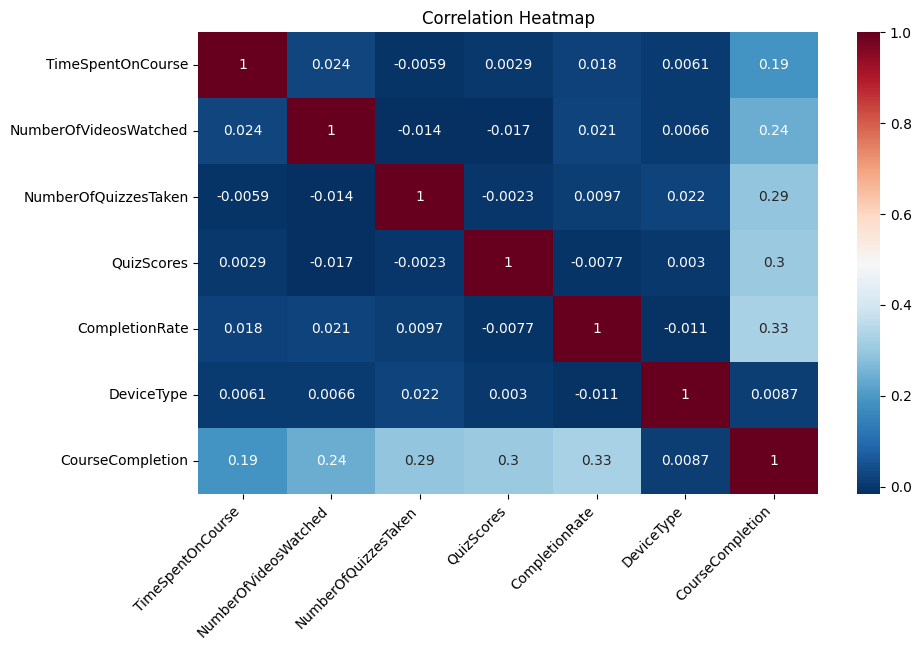

In [12]:
# Calculate the correlation matrix
correlation_matrix = df_new.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r')

# Add labels and title
plt.title("Correlation Heatmap")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.show()

Time Spent On Course, Number Of Videos Watched,Number Of Quizzes Taken,Quiz Scores, and Completion Rate is moderately positively correlate to the Course completion

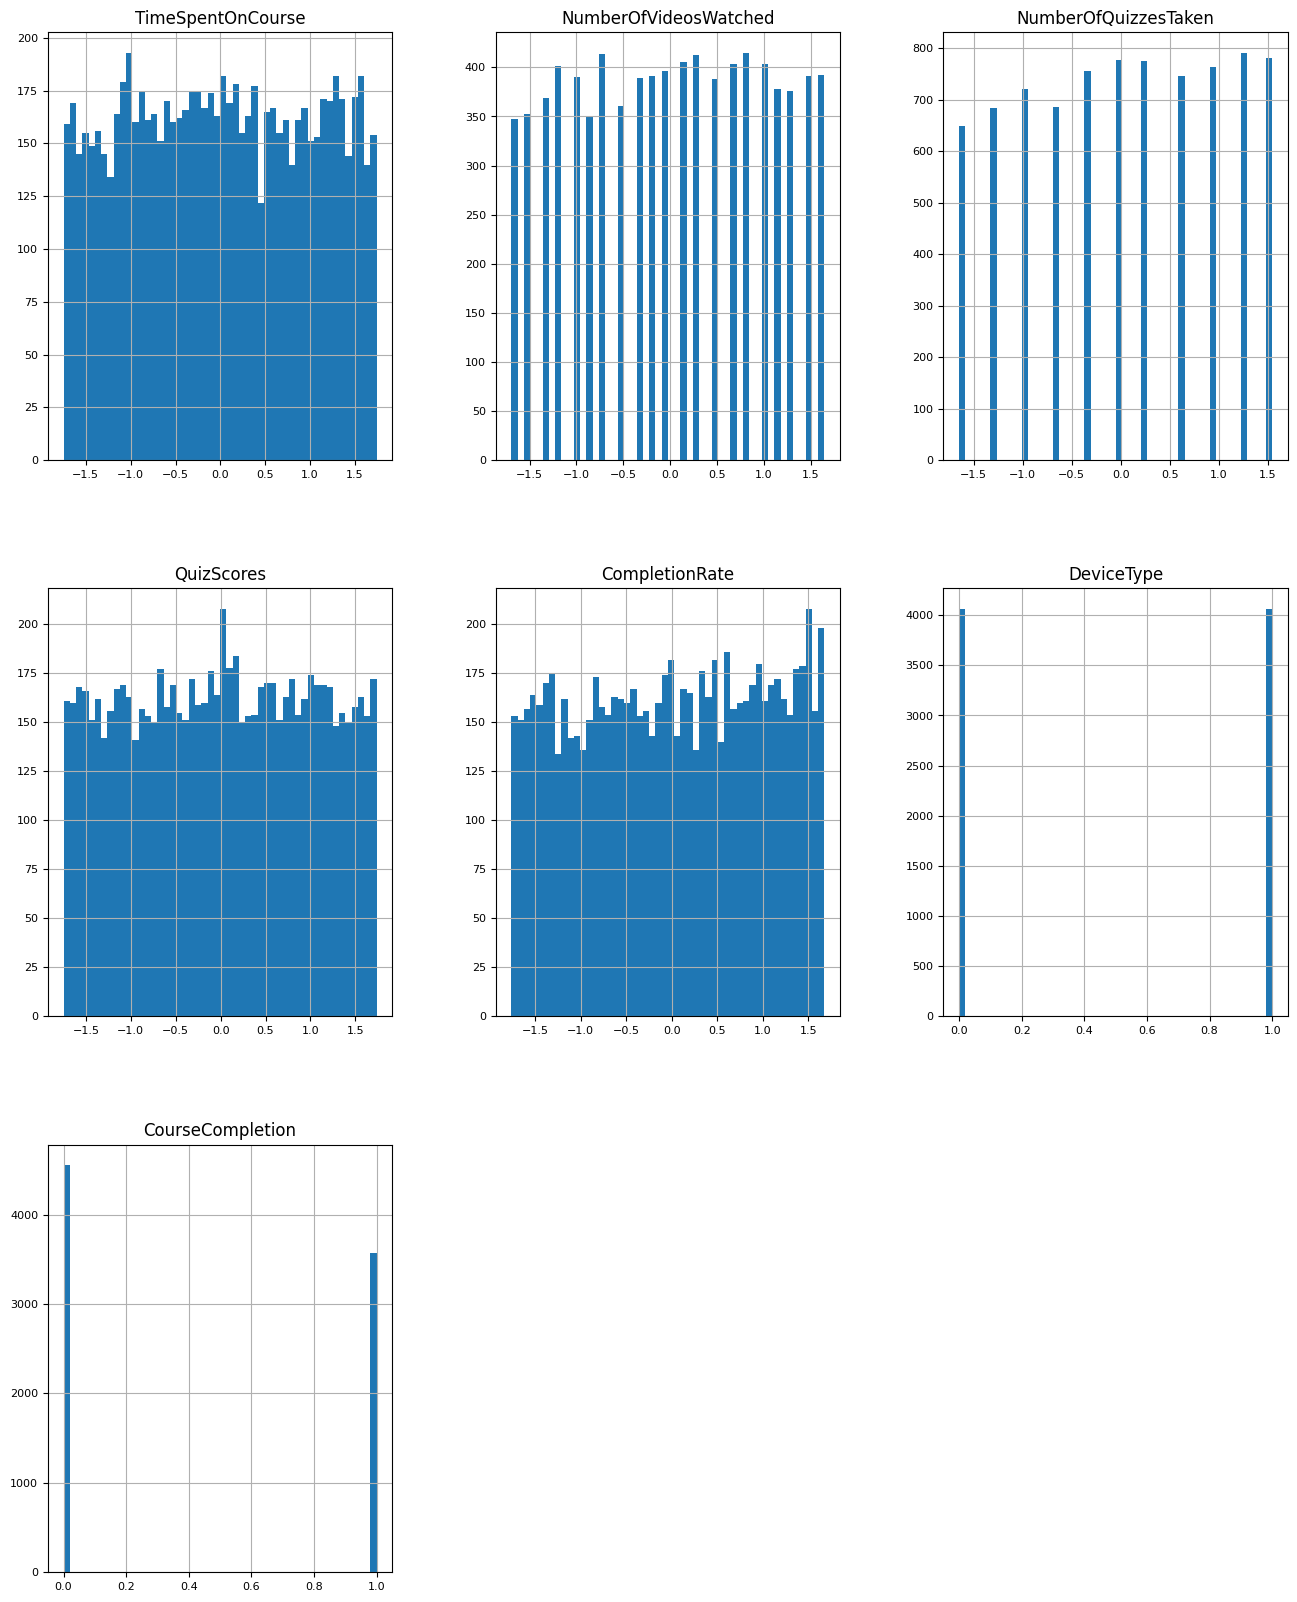

In [13]:
# Plot the distribution for all the numerical features
df_new.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);
plt.show()

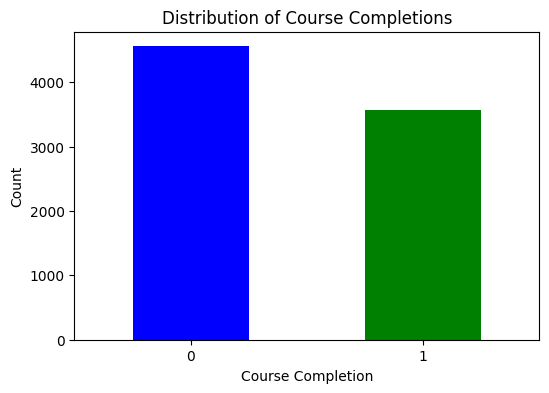

In [14]:
# Distribution of the predicted variable
device_type_counts = df_new['CourseCompletion'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
device_type_counts.plot(kind='bar', color=['blue', 'green'])
plt.title("Distribution of Course Completions")
plt.xlabel("Course Completion")
plt.ylabel("Count")
plt.xticks(rotation=0)

plt.show()

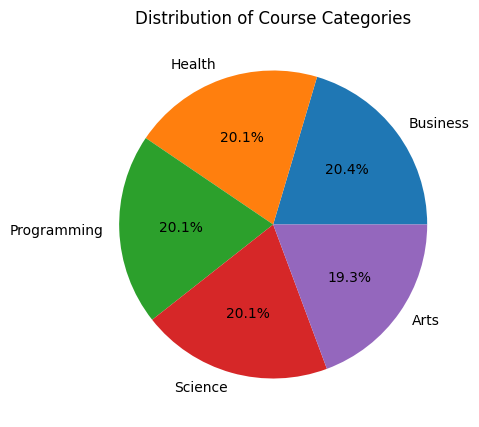

In [15]:
course_category_counts = df['CourseCategory'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(course_category_counts, labels=course_category_counts.index, autopct="%1.1f%%")
plt.title("Distribution of Course Categories")

plt.show()

<Figure size 1200x600 with 0 Axes>

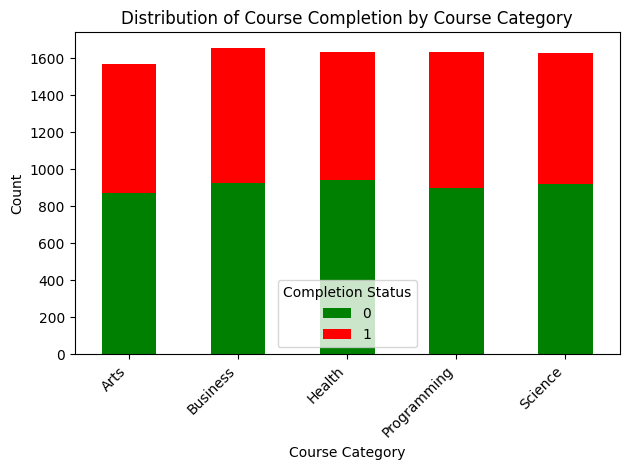

In [16]:
#distribution of Course category with completion rate
df['CourseCompletion_Binary'] = df['CourseCompletion'].apply(lambda x: 1 if x else 0) # Create a binary feature for course completion

# Group data by CourseCategory_encoded and calculate completion counts
course_completion_counts = df.groupby('CourseCategory')['CourseCompletion_Binary'].value_counts().unstack(fill_value=0)

# Create a stacked bar plot
plt.figure(figsize=(12, 6))
course_completion_counts.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title("Distribution of Course Completion by Course Category")
plt.xlabel("Course Category")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Completion Status")

plt.tight_layout()
plt.show()

This plot shows more than half of students in each course complete the relevant course

### Split the data

In [33]:
# Define features
features = encoded_df.drop(['CourseCompletion','UserID'], axis=1)
target = encoded_df['CourseCompletion']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print("Training data shapes:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

print("Testing data shapes:")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

Training data shapes:
X_train: (6498, 7)
y_train: (6498,)
Testing data shapes:
X_test: (1625, 7)
y_test: (1625,)


### Model development

##### Train the model

Since this is a classification problem I try Logistic Regression, Support Vector Machines (SVM), and Gradient Boosting for  prediction task and get the accuracy score for choose the best algorithm.

In [34]:
# Define and train models
models = {}

# Logistic Regression
models['Logistic Regression'] = LogisticRegression(random_state=42)
models['Logistic Regression'].fit(X_train, y_train)

# Support Vector Machine (SVM)
models['SVM'] = SVC(random_state=42)
models['SVM'].fit(X_train, y_train)

# Gradient Boosting
models['Gradient Boosting'] = GradientBoostingClassifier(random_state=42)
models['Gradient Boosting'].fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

##### Evaluate models using accuracy

In [35]:
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.7932
SVM Accuracy: 0.8609
Gradient Boosting Accuracy: 0.9600


According to the accuracy score, highest accuracy obtain by Gradient Boosting algorithm. So, further analysis will be done by Gradient Boosting algorithm.

##### Hyperparameter tuning Gradient Boosting using GridSearchCV

In [36]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.05, 0.01],
    'n_estimators': [200, 300],
    'max_depth': [3, 5],
    'min_samples_split': [5, 10]
}

In [37]:
# Create a GridSearchCV object with Gradient Boosting classifier and the parameter grid
gbc_grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=param_grid)

# Fit the GridSearchCV object to the training data
gbc_grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Hyperparameters:", gbc_grid_search.best_params_)

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 300}


In [38]:
# Access the best model from GridSearchCV
best_gradient_boosting_model = gbc_grid_search.best_estimator_

# Evaluate the best model on the testing data
y_pred = best_gradient_boosting_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Best Hyperparameters: {accuracy:.4f}")

Accuracy with Best Hyperparameters: 0.9600


In [42]:
# Create a DataFrame with labels
results = pd.DataFrame({
    'Actual Completion': y_test,
    'Predicted Completion': y_pred
})

results.head()

,Actual Completion,Predicted Completion
2015,0,0
4933,1,1
5812,1,1
7047,1,1
6300,1,1


Classification report

In [40]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate additional metrics
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

Confusion Matrix:
[[875  19]
 [ 46 685]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       894
           1       0.97      0.94      0.95       731

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



Test the model with unseen data

In [50]:
# Create a DataFrame for the new student data
new_student_data = pd.DataFrame({
  'TimeSpentOnCourse': [97.6704	],
  'NumberOfVideosWatched': [10],
  'NumberOfQuizzesTaken': [12],
  'QuizScores': [95],
  'CompletionRate': [85],
  'DeviceType': [1],
  'CourseCategory_encoded': [4]
})

# Make predictions for the new student data
predicted_completion = best_gradient_boosting_model.predict(new_student_data)
print(predicted_completion)

[1]
